Análisis de datos desde múltiples archivos

## Questions

- ¿Cómo puedo hacer las mismas operaciones en muchos archivos diferentes?

## Objetivos

- Utilice una función de biblioteca para obtener una lista de nombres de archivos que coinciden con un patrón de comodines.

- Escribir un bucle for para procesar varios archivos.

Al ejecutar la simulación, realizamos otras cuatro simulaciones con diferentes materiales para la película que bloquea la luz led. Para ver estos datos, y cómo se compara con nuestra simulación de base, necesitamos usar una biblioteca con un nombre habitual: `glob`.

In [1]:
import glob

La biblioteca `glob` contiene una función, también llamada `glob`, que encuentra archivos y directorios cuyos nombres coinciden con un patrón. Proporcionamos esos patrones como cadenas: el carácter `*` coincide con cero o más caracteres, mientras que `?` coincide con cualquier carácter. Podemos usar esto para obtener los nombres de todos los archivos CSV en el directorio actual:

In [2]:
print(glob.glob('data/simulation*.txt'))

['data/simulation04.txt', 'data/simulation01.txt', 'data/simulation03.txt', 'data/simulation05.txt', 'data/simulation02.txt']


Como muestran estos ejemplos, el resultado de`glob.glob`es una lista de rutas de archivos y directorios en orden arbitrario. Esto significa que podemos hacer un bucle sobre él para hacer algo con cada nombre de archivo a la vez. En nuestro caso, el "algo" que queremos hacer es tomar la sección transversal de cada conjunto de datos y comparar las gráficas de línea resultantes.

data/simulation04.txt
data/simulation01.txt
data/simulation03.txt
data/simulation05.txt
data/simulation02.txt


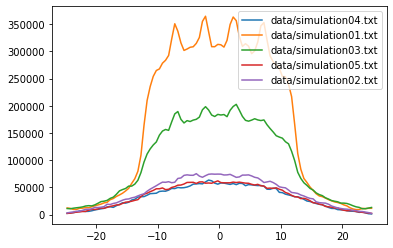

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt



filenames = glob.glob('data/simulation*.txt')
for filename in filenames:
    print(filename)

    sim = np.loadtxt(fname=filename, skiprows=52)
    
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]

    # Find the closest y-value to 0
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    luminance_cross_section = rad[y==smallest_y]

    # by adding a 'label' argument we can create a legend!
    plt.plot(x_cross_section, luminance_cross_section, label=filename)

# If we add labels to our plot, we have to call this command to draw the legend on the graph!
plt.legend()


Nuestros otros conjuntos de datos tienen valores de pico de luminancia drásticamente diferentes, lo que significa que nuestro primer conjunto de datos es el mejor para ser comparado directamente con los datos experimentales. 


# Más trazado con Matplotlib

Pero la verdad es que podemos mejorar este gráfico significativamente. Los ejes necesitan ser etiquetados, y si intenta ejecutar el código anterior en un script python puro, no funcionará. ¿Qué da? 

Esto se debe a que los portátiles jupyter se integran perfectamente con matplotlib para gráficas simples. Hay algunos pasos adicionales que necesitamos emplear para recrear la figura en un script de python puro. Además, si queremos características de trazado más complicadas (p. ej., subtramas) necesitamos incluir algunos pasos adicionales.

La receta "estándar" para crear una trama matplotlib es la siguiente.

1. Crear un objeto de `figura`  (como obtener un pedazo de papel sobre el que vamos a dibujar)
2. Añadir `ejes`/`subtramas` a la `figura` (Esto equivale a dibujar cajas/ejes sobre papel, en el que vamos a trazar datos)
3. Trazar los datos sobre los ejes 
4. Etiquetar los ejes 

Para demostrar esto vamos a construir un gráfico a continuación, con la dispersión de cada simulación en la parte superior y el gráfico de línea en la parte inferior.

data/simulation01.txt
data/simulation02.txt
data/simulation03.txt
data/simulation04.txt
data/simulation05.txt


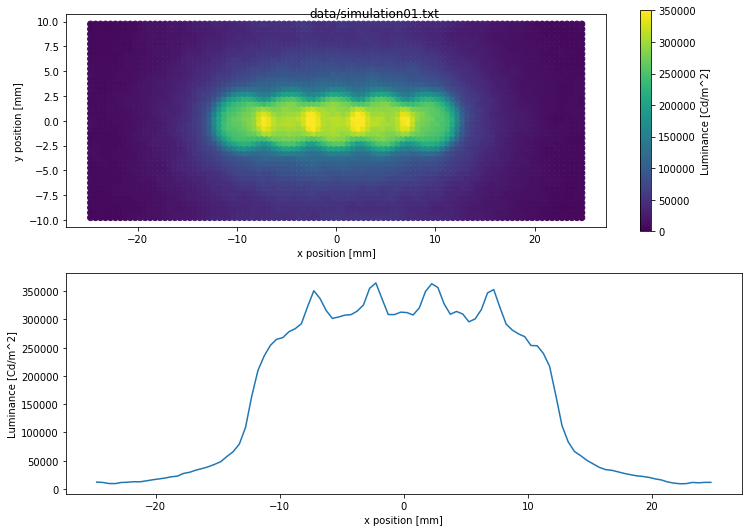

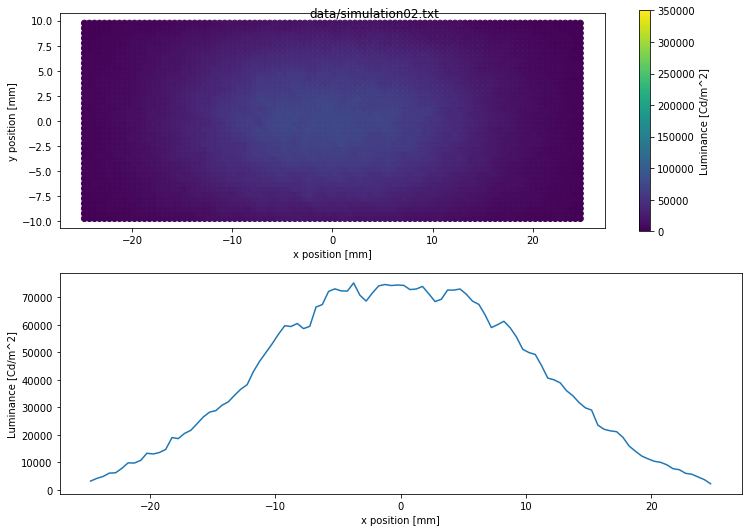

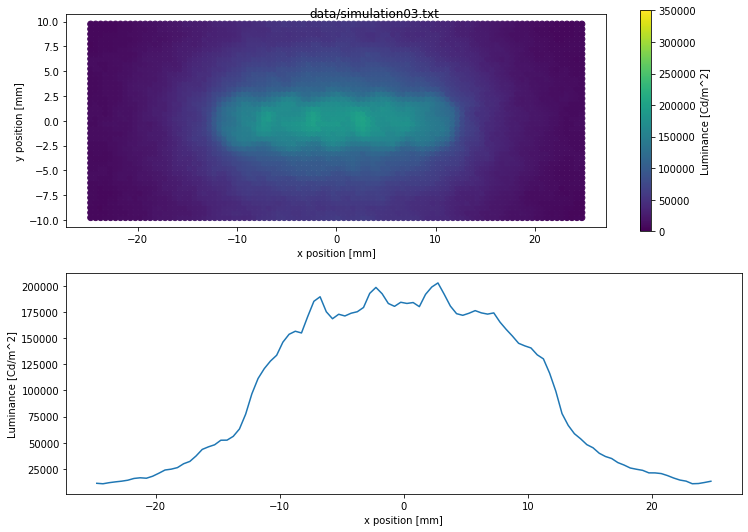

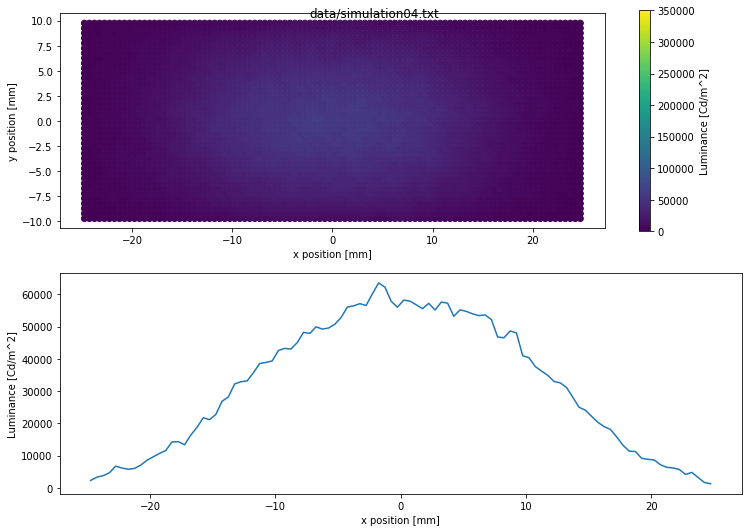

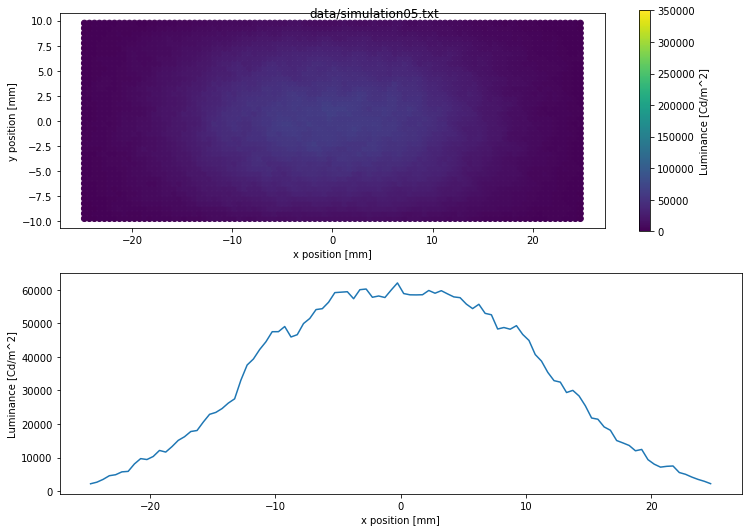

In [4]:

filenames = sorted(glob.glob('data/simulation*.txt'))
for filename in filenames:
    print(filename)

    sim = np.loadtxt(fname=filename, skiprows=52)
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]
    # Find the closest y-value to 0
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    luminance_cross_section = rad[y==smallest_y]

    
    # figsize lets use say how big the figure (our canvas) should be in inches (horizontal by vertical)
    fig = plt.figure(figsize=(10.5, 7.5))

    # fig.add_subplot(211)? What? This tells matplotlib how many plots and which one this is. 
    # 212 = plots will be on a 2 x 1 grid and this is plot 2
    # 335 = plots will be on a 3 x 3 grid and this is plot 5
    # plot order is left -> right, then top -> bottom.
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    # vmin and vmax set the min and max value for the color
    sc = ax1.scatter(x, y, c=rad, vmin=0, vmax=350000)
    # let's create a colorbar this time
    cb = fig.colorbar(sc, ax=ax1)
    
    ax2.plot(x_cross_section, luminance_cross_section)
    
    # set the labels for each plot starting with ax1
    ax1.set_ylabel('y position [mm]')
    ax1.set_xlabel('x position [mm]')
    
    # then ax2
    ax2.set_ylabel('Luminance [Cd/m^2]')
    ax2.set_xlabel('x position [mm]')
    
    # then the new colorbar we've made
    cb.set_label('Luminance [Cd/m^2]')
    
    # Finally, we can set the title on each ax individually, but we can also set it on the whole figure
    # "suptitle" = "super title"
    fig.suptitle(filename)
    
    # the plot on ax1 should have equal spacing between points on the x and y-axes because it is physical space
    # So we set the aspect ratio of the plot to 1, to achieve this
    ax1.set_aspect(1)
    fig.tight_layout()
    
    # Finally we can save the figure as the filename but with .png instead of .txt
    fig.savefig(filename[:-3]+'png')



Esta celda contiene un montón de código nuevo! Por suerte, hay muy pocos conceptos nuevos, y esto es solo un conjunto de funciones para recordar (no todos los que se necesita). Aquí está el resumen de los nuevos comandos que se han incluido en el orden en que aparecen.

- `fig = plt.figure()` Esto crea el objeto de la figura

    - `plt.figure(figsize=(x, y))` esto establece el tamaño de la figura en `x` pulgadas por `y` pulgadas

- `fig.add_subplot(211)` Añadir nuevos ejes a la figura. 
    - La cifra será **2** filas por **1** columna y se trata de la gráfica **#1***

- `sc = ax1.scatter()` Las funciones de trazado devuelven objetos de trazado que podemos almacenar en variables y usar más tarde

    - `vmin=0, vmax=350000` esto establece los límites de color

- `cb = fig.colorbar(sc, ax=ax1)` Podemos añadir una barra de colores a la gráfica especificando el objeto de la gráfica y los ejes

- `<object>. set_label()` Podemos utilizar los diversos métodos de `set_label` para añadir etiquetas a nuestros ejes y colorbar

- `fig.suptitle()` El comando suptitle nos permite establecer el título "súper" para la figura

- `ax1.set_aspect()` Esto nos permite establecer la relación de aspecto para la figura. Una relación de aspecto de 1 significa que los cambios en los datos en x cambios de datos iguales en y. No cambia la forma de la imagen, como el término significa en fotografía.

- `fig.savefig()` guarda la figura como un archivo de imagen

Ejercicio 1* - glob dot glob

1. Utilice `glob.glob` para imprimir todos los archivos `.ipynb` en el directorio de trabajo actual (que debe contener todas las lecciones!) 

2. ¿Cuál es el patrón de cadena más corto que solo obtiene los archivos `.ipynb` que comienzan con "0"?

In [5]:
# Enter your solution here
import glob

glob.glob('*.ipynb')

# Dos caracteres parecen ser el mínimo. Esto fue probado en cuadernos 
# la carpeta sin comprimir, sin alterar, materiales del curso. Este cuaderno debe estar en 
# esa misma carpeta para que esta respuesta funcione
glob.glob('0*')

['04StoringMultipleValuesInLists.ipynb',
 '03RepeatingActionsWithLoops.ipynb',
 '09Debugging.ipynb',
 '01Fundamentals.ipynb',
 '08DefensiveProgramming.ipynb',
 '05MakingChoices.ipynb',
 '02AnalyzingRadianceData.ipynb',
 '06AnalyzingDataFromMultipleFiles.ipynb',
 '07CreatingFunctions.ipynb']

Ejercicio 2* - Trazando diferencias

Grafique la diferencia entre los radiancias encontrados en las simulaciones 02 y 04 en la sección transversal y más pequeña.

1. Carga ambos desde csv
2. Extraer las secciones transversales de radiación a lo largo del mismo lugar
3. Tomar la diferencia entre las dos matrices y trazarlas

> **SUGERENCIA:** Debe abordar este ejercicio (y los siguientes en esta lección) de la misma manera. Pruebe un enfoque "rápido y sucio". Si solo tuvieras un par de minutos para hacer cada uno y tuvieras que hacerlo funcionar en ese tiempo, ¿qué harías? Deberías copiar/pegar tanto como puedas; ¡usa el código de antes en la lección! No te preocupes por la duplicación de código o hacerlo "bien". Obtén algo que funcione lo más rápido posible. ¡Es posible completar el ejercicio en menores de 30 años con este enfoque!

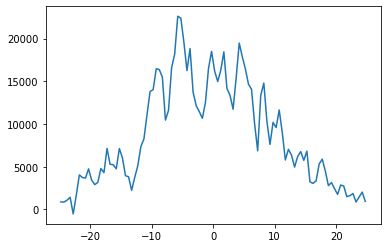

In [6]:
# Enter your solution here
import numpy as np
import matplotlib.pyplot as plt


sim = np.loadtxt(fname='data/simulation02.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]
# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
x_cross_section = x[y==smallest_y]

luminance_cross_section02 = rad[y==smallest_y]

sim = np.loadtxt(fname='data/simulation04.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]
# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
x_cross_section = x[y==smallest_y]

luminance_cross_section04 = rad[y==smallest_y]


diff = luminance_cross_section02 - luminance_cross_section04
plt.plot(x_cross_section, diff)

# Ejercicio 3 - Generar estadísticas compuestas

Podemos ver fácilmente que el primer conjunto de datos de simulación coincide con el experimento más de cerca, pero debemos comprobar los otros conjuntos de datos también. Para cada conjunto de datos, utilice la indexación booleana para encontrar la luminancia media (la luminancia entre -10 mm <= x <= +10 mm) en las secciones transversales y calcular la diferencia porcentual con la luminancia media experimental equivalente en la misma región.

In [7]:
import glob
import numpy


filenames = glob.glob('data/simulation*.txt')
experiment = numpy.loadtxt(fname='data/experiment01.csv', delimiter=',')
x_exp = experiment[:, 0]
L_exp = experiment[:, 1]
for filename in filenames:
    sim = np.loadtxt(fname=filename, skiprows=52)
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]
    # Find the closest y-value to 0
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    L = rad[y==smallest_y]
    
    sim_mean = np.mean(L[np.logical_and(x_cross_section>=-10., x_cross_section<=10.)])
    exp_mean = np.mean(L_exp[np.logical_and(x_exp>=-10., x_exp<=10.)])
    
    diff = (sim_mean - exp_mean)*100./exp_mean
    print(diff)

-82.72425871918331
3.319310065215488
-42.73462211252939
-81.94342576807645
-77.88975272561785


# Ejercicio 4 - Subtramas

a) Traza todos los gráficos de dispersión de la lección en una sola figura, en la forma 3 x 2. No es necesario crear los ejes 6, sin usar.

b) Dibuje todos los diagramas de líneas de la lección en otra sola figura, esta vez como una sola columna de 5 diagramas.

data/simulation01.txt
data/simulation02.txt
data/simulation03.txt
data/simulation04.txt
data/simulation05.txt


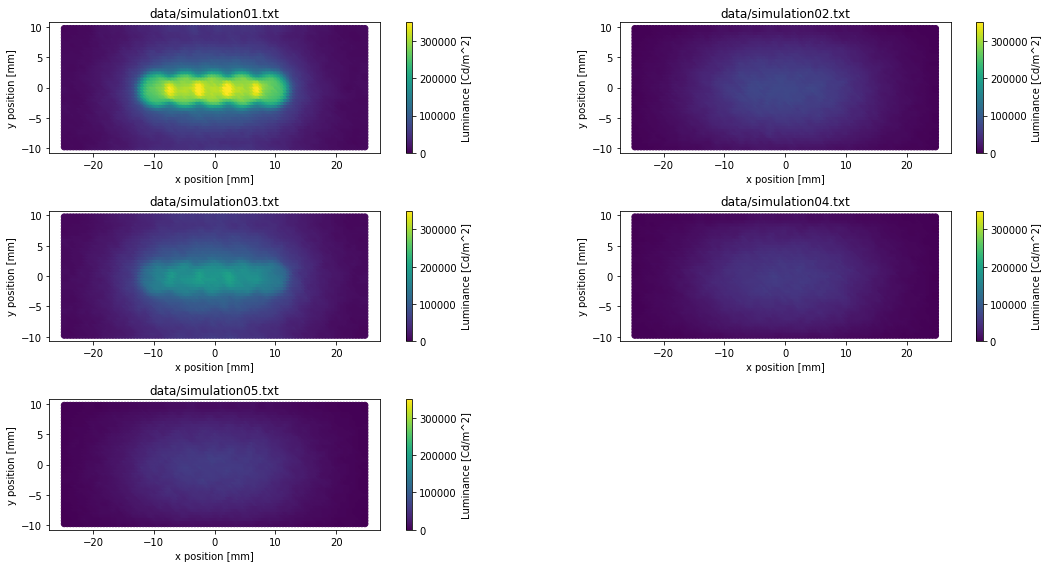

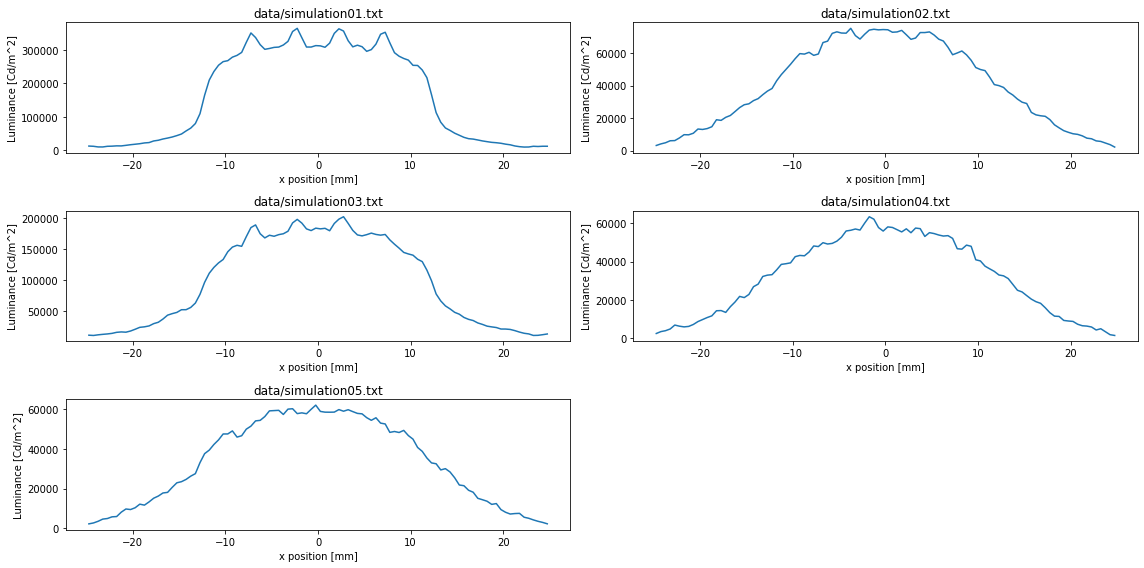

In [8]:
fig1 = plt.figure(figsize=(16,8))
fig2 = plt.figure(figsize=(16,8))

filenames = sorted(glob.glob('data/simulation*.txt'))
for i, filename in enumerate(filenames):
    print(filename)

    sim = np.loadtxt(fname=filename, skiprows=52)
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    luminance_cross_section = rad[y==smallest_y]

    ax1 = fig1.add_subplot(3,2,i+1)
    ax2 = fig2.add_subplot(3,2,i+1)
    
    sc = ax1.scatter(x, y, c=rad, vmin=0, vmax=350000)
    cb = fig.colorbar(sc, ax=ax1)
    
    ax2.plot(x_cross_section, luminance_cross_section)
    
    ax1.set_ylabel('y position [mm]')
    ax1.set_xlabel('x position [mm]')
    
    ax2.set_ylabel('Luminance [Cd/m^2]')
    ax2.set_xlabel('x position [mm]')
    
    cb.set_label('Luminance [Cd/m^2]')
    
    ax1.set_title(filename)
    ax2.set_title(filename)

    ax1.set_aspect(1)
    
    
fig1.tight_layout()
fig2.tight_layout()